In [69]:
import pandas as pd

In [70]:
data_frame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [71]:
data_frame.head()
#ilk 5 rowu getirdi

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [72]:
import seaborn as sbn
import matplotlib.pyplot as plt

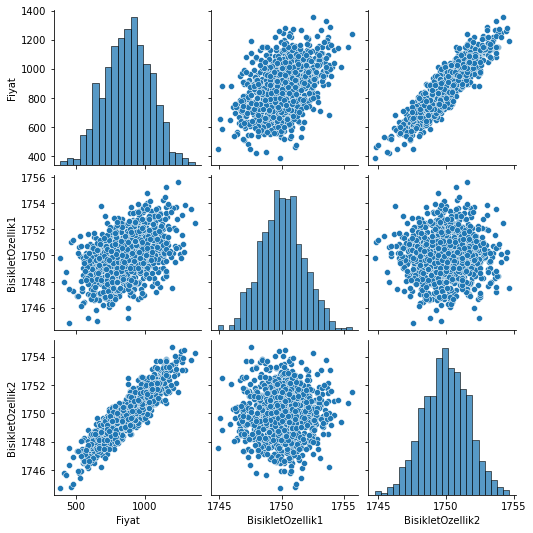

In [73]:
sbn.pairplot(data_frame)
#bütün verileri birbirlerine göre olan grafiklerini farklı türlerde (barchart, scatter plot vb.) olarak bastırdı

## veriyi test/train olarak ikiye ayırmak

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# y= wx + b
# y -> label(yani ulaşılmak istenen, bu örnekte satış fiyatı)

y= data_frame["Fiyat"].values

# x -> feature (özellik)

x= data_frame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [76]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [77]:
x_train.shape
#670 tane veri trainin içine geldi

(670, 2)

In [78]:
x_test.shape
#330 veri testin içine geldi (%33 demiştik)

(330, 2)

In [79]:
y_train.shape
#sadece fiyatı içerdiği için virgülden sonra 2 yazmıyor
#x 2 veri içerdiği için matrixtir ama y değil

(670,)

In [80]:
y_test.shape

(330,)

## scaling

In [81]:
# fiyat verilerimiz 0-1 arasında yuvarlansın
# sadece x kısmını yapsak yeter çünkü veriler orada 

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler = MinMaxScaler()

In [84]:
scaler.fit(x_train)

MinMaxScaler()

In [85]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [87]:
import tensorflow as tf

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [89]:
model = Sequential()
#modeli ekledik ( ilk çağırdığımı< seq. ile)

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu")) 
# 3 katman oluşturdum ve hepsi 4 nöronlu

model.add(Dense(1))
#çıktı katmanı

model.compile(optimizer="rmsprop",loss="mse")
#compile ile tüm bu işlemleri birleştirip çalıştırmaya hazır hale getiriyor

In [90]:
model.fit(x_train,y_train,epochs=250)
# x traini y train ile eğit, veri sayısı az old. için batch kullanmadık (veriyi kaçar kaçar verelim)
# epoch -> kaç kere çalışacak (bütün veri setinden 1 kere geçmek = 1 epok)

Epoch 1/250
21/21 [==============================] - 0s 475us/step - loss: 795330.2500
Epoch 2/250
21/21 [==============================] - 0s 429us/step - loss: 794940.9375
Epoch 3/250
21/21 [==============================] - 0s 475us/step - loss: 794500.0625
Epoch 4/250
21/21 [==============================] - 0s 522us/step - loss: 793984.3750
Epoch 5/250
21/21 [==============================] - 0s 427us/step - loss: 793389.6875
Epoch 6/250
21/21 [==============================] - 0s 475us/step - loss: 792700.9375
Epoch 7/250
21/21 [==============================] - 0s 475us/step - loss: 791924.7500
Epoch 8/250
21/21 [==============================] - 0s 475us/step - loss: 791046.8750
Epoch 9/250
21/21 [==============================] - 0s 427us/step - loss: 790058.6250
Epoch 10/250
21/21 [==============================] - 0s 475us/step - loss: 788941.6875
Epoch 11/250
21/21 [==============================] - 0s 427us/step - loss: 787684.9375
Epoch 12/250
21/21 [=====================

21/21 [==============================] - 0s 380us/step - loss: 3105.6460
Epoch 95/250
21/21 [==============================] - 0s 427us/step - loss: 3035.6230
Epoch 96/250
21/21 [==============================] - 0s 427us/step - loss: 2958.5742
Epoch 97/250
21/21 [==============================] - 0s 413us/step - loss: 2881.3713
Epoch 98/250
21/21 [==============================] - 0s 380us/step - loss: 2805.3335
Epoch 99/250
21/21 [==============================] - 0s 380us/step - loss: 2720.3997
Epoch 100/250
21/21 [==============================] - 0s 427us/step - loss: 2656.5525
Epoch 101/250
21/21 [==============================] - 0s 427us/step - loss: 2602.7407
Epoch 102/250
21/21 [==============================] - 0s 380us/step - loss: 2531.0042
Epoch 103/250
21/21 [==============================] - 0s 380us/step - loss: 2466.8237
Epoch 104/250
21/21 [==============================] - 0s 380us/step - loss: 2414.3071
Epoch 105/250
21/21 [==============================] - 0s 380u

21/21 [==============================] - 0s 475us/step - loss: 74.7711
Epoch 190/250
21/21 [==============================] - 0s 475us/step - loss: 75.7017
Epoch 191/250
21/21 [==============================] - 0s 522us/step - loss: 74.8161
Epoch 192/250
21/21 [==============================] - 0s 427us/step - loss: 75.1214
Epoch 193/250
21/21 [==============================] - 0s 475us/step - loss: 74.9083
Epoch 194/250
21/21 [==============================] - 0s 380us/step - loss: 75.4062
Epoch 195/250
21/21 [==============================] - 0s 427us/step - loss: 75.5228
Epoch 196/250
21/21 [==============================] - 0s 427us/step - loss: 74.8777
Epoch 197/250
21/21 [==============================] - 0s 427us/step - loss: 75.6536
Epoch 198/250
21/21 [==============================] - 0s 427us/step - loss: 74.2407
Epoch 199/250
21/21 [==============================] - 0s 380us/step - loss: 75.4479
Epoch 200/250
21/21 [==============================] - 0s 427us/step - loss: 74

In [91]:
loss=model.history.history["loss"] #parantez içinde dizi haline getirdik
#loss değerlerini sözlük olarak verdi

In [92]:
loss

[795330.25,
 794940.9375,
 794500.0625,
 793984.375,
 793389.6875,
 792700.9375,
 791924.75,
 791046.875,
 790058.625,
 788941.6875,
 787684.9375,
 786282.9375,
 784729.75,
 783005.1875,
 781104.3125,
 779006.9375,
 776719.5,
 774205.4375,
 771460.4375,
 768491.3125,
 765252.375,
 761759.875,
 757972.8125,
 753896.25,
 749511.875,
 744811.5625,
 739783.625,
 734394.8125,
 728666.625,
 722553.0625,
 716070.5,
 709181.875,
 701879.625,
 694143.5625,
 686000.9375,
 677473.9375,
 668442.1875,
 658937.3125,
 648933.5625,
 638496.125,
 627524.6875,
 616200.0,
 604322.3125,
 591936.125,
 579019.4375,
 565690.9375,
 551809.9375,
 537520.6875,
 522721.78125,
 507407.09375,
 491643.375,
 475469.09375,
 458828.1875,
 441846.6875,
 424406.34375,
 406587.09375,
 388601.90625,
 370227.0,
 351479.4375,
 332475.71875,
 313470.53125,
 294260.3125,
 274924.0,
 255597.703125,
 236461.03125,
 217430.515625,
 198434.03125,
 179795.921875,
 161397.328125,
 143516.09375,
 126302.953125,
 109638.828125,
 9385

<AxesSubplot:>

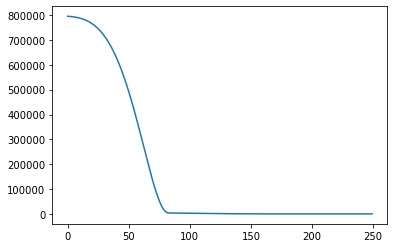

In [93]:
sbn.lineplot(x=range(len(loss)),y=loss)
#azaldıktan sonra artmaması iyidir

In [94]:
train_loss = model.evaluate(x_train,y_train,verbose=0)

In [95]:
test_loss= model.evaluate(x_test,y_test,verbose=0)

In [96]:
train_loss

73.44796752929688

In [97]:
test_loss
#test ve trainin yakın değerler çıkması iyidir

74.86286163330078

In [98]:
test_tahminleri = model.predict(x_test)
#x testi vericez , y testi tahmin edecek
#yani özelliklere bakıp fiyatı tahmin edecek

In [104]:
test_tahminleri

array([[1078.5789 ],
       [ 624.1059 ],
       [ 876.6736 ],
       [ 894.7552 ],
       [ 900.01324],
       [ 451.53665],
       [ 931.7428 ],
       [ 992.09314],
       [ 941.8638 ],
       [1017.4852 ],
       [ 751.3622 ],
       [ 918.50116],
       [ 948.0996 ],
       [1055.4629 ],
       [1122.3268 ],
       [ 681.89056],
       [1127.7711 ],
       [ 651.1863 ],
       [1155.4208 ],
       [ 887.11285],
       [ 893.3845 ],
       [ 717.191  ],
       [ 456.93906],
       [ 612.2363 ],
       [ 835.5311 ],
       [1092.0237 ],
       [ 714.1384 ],
       [ 757.2913 ],
       [ 873.9961 ],
       [ 771.0437 ],
       [ 451.33633],
       [ 783.5281 ],
       [ 728.6657 ],
       [ 647.0852 ],
       [ 887.2824 ],
       [ 844.3081 ],
       [1036.4769 ],
       [1023.49274],
       [ 845.4585 ],
       [ 862.74084],
       [ 757.5686 ],
       [1175.4526 ],
       [1098.4172 ],
       [1088.6207 ],
       [ 873.7616 ],
       [ 596.8672 ],
       [1146.5637 ],
       [ 973.

In [100]:
tahmin_data_frame= pd.DataFrame(y_test,columns=["Gerçek Y"])

In [101]:
tahmin_data_frame

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [108]:
test_tahminleri = pd.Series(test_tahminleri.reshape(330,))
#test tahminlerini seriye dönüştürüp aynı shape yapıp data frame e ekledik
#2 kere çalıştırdığım için hatalı gözüküyor aslında sorun yok

AttributeError: 'Series' object has no attribute 'reshape'

In [109]:
test_tahminleri

0      1078.578857
1       624.105896
2       876.673584
3       894.755188
4       900.013245
          ...     
325    1014.278564
326     791.239319
327     766.410828
328    1168.490845
329     803.174866
Length: 330, dtype: float32

In [110]:
tahmin_data_frame = pd.concat([tahmin_data_frame,test_tahminleri],axis=1)

In [111]:
tahmin_data_frame

,Gerçek Y,0
0,1081.652164,1078.578857
1,622.675990,624.105896
2,889.356810,876.673584
3,902.826733,894.755188
4,897.662404,900.013245
...,...,...
325,1028.438035,1014.278564
326,789.934950,791.239319
327,758.490486,766.410828
328,1172.871659,1168.490845


In [122]:
tahmin_data_frame.columns = ["Gerçek Y","Tahmin Y"]

In [123]:
tahmin_data_frame

,Gerçek Y,Tahmin Y
0,1081.652164,1078.578857
1,622.675990,624.105896
2,889.356810,876.673584
3,902.826733,894.755188
4,897.662404,900.013245
...,...,...
325,1028.438035,1014.278564
326,789.934950,791.239319
327,758.490486,766.410828
328,1172.871659,1168.490845


<AxesSubplot:xlabel='Gerçek Y', ylabel='Tahmin Y'>

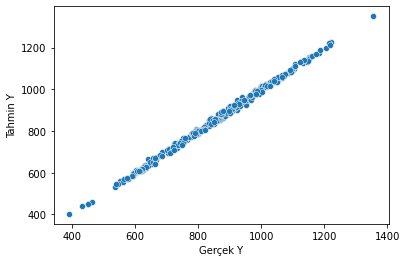

In [124]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y",data = tahmin_data_frame)
#düz bir çizgi gibi çıkması iyi

In [125]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [129]:
mean_absolute_error(tahmin_data_frame["Gerçek Y"],tahmin_data_frame["Tahmin Y"])
#gerçek hatamızı bulduk

6.927880937829069

In [130]:
mean_squared_error(tahmin_data_frame["Gerçek Y"],tahmin_data_frame["Tahmin Y"])

74.86288834428541

In [131]:
data_frame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [132]:
# ortalaması 872 lira olan bir veride 7 liralık sapmamız var

In [139]:
yeni_bisiklet_ozellikleri = [[1750,1749]] 
#özellikleri böyle olan yeni bir bisiklet geldi diyelim

In [140]:
yeni_bisiklet_ozellikleri= scaler.transform(yeni_bisiklet_ozellikleri)

In [141]:
model.predict(yeni_bisiklet_ozellikleri)
#fiyatımızı tahmin etti

array([[786.176]], dtype=float32)

In [142]:
from tensorflow.keras.models import load_model
#kaydetmek için

In [144]:
model.save("bisiklet.modeli.h5")
#h5 uzantısının adıdır, bisiklet modeli ismiyle bunlarla aynı dosyaya kaydettim

In [ ]:
sonradan_cagirilan_model = load_model()